# Задачи 5-6

Импорт модулей

In [ ]:
import os
import numpy as np
from numpy import pi, sin, cos, sqrt
import datetime as dt
import matplotlib.pyplot as plt

from scipy.misc import derivative
from scipy.interpolate import interp1d
from scipy import integrate

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Чтение файлов

In [ ]:
if IN_COLAB:
  NRLMSIS_day = np.loadtxt('/content/drive/MyDrive/exam_rrv/NRLMSIS_day.txt', skiprows=1)
  NRLMSIS_night = np.loadtxt('/content/drive/MyDrive/exam_rrv/NRLMSIS_night.txt', skiprows=1)
  IRI_day = np.loadtxt('/content/drive/MyDrive/exam_rrv/IRI2016_day.txt', skiprows=35)
  IRI_night = np.loadtxt('/content/drive/MyDrive/exam_rrv/IRI2016_night.txt', skiprows=35)
else:
  NRLMSIS_day = np.loadtxt('NRLMSIS_day.txt', skiprows=1)
  NRLMSIS_night = np.loadtxt('NRLMSIS_night.txt', skiprows=1)
  IRI_day = np.loadtxt('IRI2016_day.txt', skiprows=35)
  IRI_night = np.loadtxt('IRI2016_night.txt', skiprows=35)

Создание массивов

In [ ]:
N_e_day = np.array([item[1] for item in IRI_day], dtype=np.longdouble)
N_e_night = np.array([item[1] for item in IRI_night], dtype=np.longdouble)
z = np.array([item[0] for item in IRI_day], dtype=int) * 1000

Чистка данных

In [ ]:
mask_day = N_e_day != -1
mask_night = N_e_night != -1

N_e_day = N_e_day[mask_day]
N_e_night = N_e_night[mask_night]

z_day = z[mask_day]
z_night = z[mask_night]

Блок с константами

In [ ]:
date = dt.datetime(int(NRLMSIS_day[0][0]), int(NRLMSIS_day[0][1]), int(NRLMSIS_day[0][2]), int(NRLMSIS_day[0][4]))

e_charge = -1.6 * 1e-19
mass_e = 9.1 * 1e-31
omega = 2 * pi * (8 * 1e6)

Блок с формулами для расчетов

In [ ]:
omega_plasm_day = (4 * pi * (e_charge ** 2) * N_e_day / mass_e) * 1e6
omega_plasm_night = (4 * pi * (e_charge ** 2) * N_e_night / mass_e) * 1e6
n_day = sqrt(1 - ((omega_plasm_day ** 2)/(omega ** 2)))
n_night = sqrt(1 - ((omega_plasm_night ** 2)/(omega ** 2)))

Начальные условия

In [ ]:
teta_0 = np.ones(len(n_day))*pi/4
phi_0 = np.ones(len(n_day))*pi/4

Интерполяция n

In [ ]:
interpol_n_day = interp1d(z_day, n_day, kind = 'cubic')
interpol_n_night = interp1d(z_night, n_night, kind = 'cubic')

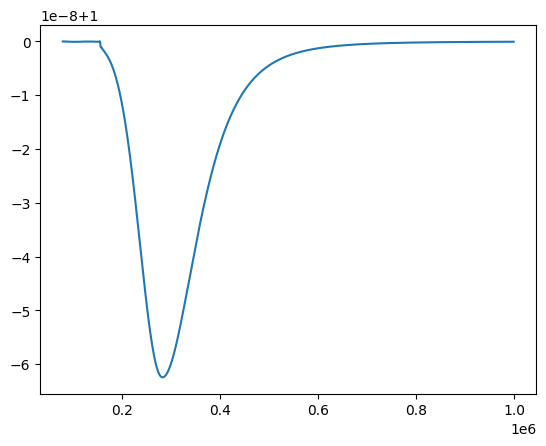

In [ ]:
z_ = np.linspace(z_night[0], z_night[-1], 4096)
plt.plot(z_, interpol_n_night(z_))

In [ ]:
p_x = lambda teta_0, phi_0: sin(teta_0) * cos(phi_0)
p_y = lambda teta_0, phi_0: sin(teta_0) * sin(phi_0)
# p_z = lambda z, n: derivative(lambda n: n**2, z, dx=1, n=1, order=3) * 1/2
p_z = lambda p_x, p_y, n: sqrt(n**2 - (p_x**2 + p_y**2))